In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from src.utils_py.io.gro import read_gro, write_gro
from src.utils_py.geom.Box import Box
from src.utils_py.geom.Cylinder import Cylinder
from src.utils_py.geom.CylinderSegment import CylinderSegment
from src.utils_py.geom.AntiCylinderSegment import AntiCylinderSegment
from src.utils_py.assembler.build import build_system

---

#### Конфигурация c антицилиндрами

In [10]:
folder = 'droplet_calcit_gromos'
dir_gro = 'ff/gromos/gro/'

In [11]:
HEIGHT = 6.5
WIDTH_X = 9.23520
WIDTH_Y = 13.49130

offset = 2
delta_h = 0.15
h = 3.02020

In [23]:
''' ПАРАМЕТРЫ НЕ ТРОГАТЬ!!! '''
insertion_limit = int(1e5)
rotation_limit = 1000
package = 0.3
distance = {'min': 0.08**2, 'opt': 0.12**2}
phi = 20

system_size = np.array([WIDTH_X, WIDTH_Y, HEIGHT + h])
# structure = Structure(box=system_size, atoms=[])
structure = read_gro(f'na_diff/{folder}/cal_fixed.gro')
points = list(structure.get_XYZ())
structure.box = system_size

names = ['spce', 'decane']
density = [33, 3] # nm-3

box = Box(
    center=np.array([WIDTH_X/2, WIDTH_Y/2, h + HEIGHT/2]),
    borders=np.array([WIDTH_X, WIDTH_Y, HEIGHT])
)

box_delta = Box(
    center=np.array([WIDTH_X/2, WIDTH_Y/2, h + HEIGHT/2]),
    borders=np.array([WIDTH_X, WIDTH_Y, HEIGHT - 2 * delta_h])
)

R = (WIDTH_Y - 2 * offset) / 2 / np.sin(np.deg2rad(phi / 2))
r = (WIDTH_Y - 2 * offset) / 2 / np.tan(np.deg2rad(phi / 2))

cylinder_segment = CylinderSegment(
    center=np.array([WIDTH_X/2, WIDTH_Y/2, h - r]), 
    cylinder=Cylinder(
        np.array([WIDTH_X/2, WIDTH_Y/2, h - r]), 
        radius=R, 
        length=WIDTH_X, 
        axis=np.array([1, 0, 0])
    ),
    segm_radius=r,
    norm=np.array([0, 0, 1])
)

cylinder_segment_delta = CylinderSegment(
    center=np.array([WIDTH_X/2, WIDTH_Y/2, h - r]), 
    cylinder=Cylinder(
        np.array([WIDTH_X/2, WIDTH_Y/2, h - r]), 
        radius=R, 
        length=WIDTH_X, 
        axis=np.array([1, 0, 0])
    ),
    segm_radius=r + delta_h,
    norm=np.array([0, 0, 1])
)

anticylinder_segment = AntiCylinderSegment(
    center=cylinder_segment.center,
    cylinder_segment=cylinder_segment,
    box=box
)

anticylinder_segment_delta = AntiCylinderSegment(
    center=cylinder_segment_delta.center,
    cylinder_segment=cylinder_segment_delta,
    box=box_delta
)

insert_shapes = [cylinder_segment_delta, anticylinder_segment_delta]
shapes = [cylinder_segment, anticylinder_segment]
numbers = list(np.round(np.array([shapes[i].get_volume() * density[i] for i in range(len(names))])).astype(int))

structure = build_system(
    dir_gro, structure, names, numbers, insert_shapes, points,
    insertion_limit=insertion_limit,
    rotation_limit=rotation_limit,
    package=package,
    min_dist2=distance['min']
)

Number of molecules:
spce 	 802
decane 	 2357

Filling system:


100%|██████████| 2357/2357 [06:12<00:00,  6.33it/s]


#### Конфигурация половины

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from src.utils_py.io.gro import read_gro, write_gro
from src.utils_py.geom.Box import Box
from src.utils_py.geom.Cylinder import Cylinder
from src.utils_py.geom.CylinderSegment import CylinderSegment
from src.utils_py.geom.AntiCylinderSegment import AntiCylinderSegment
from src.utils_py.assembler.build import build_system

In [2]:
folder = 'droplet_calcit_gromos'
dir_gro = 'ff/gromos'

In [8]:
WIDTH_X = 10.00235
WIDTH_Y = 9.63774
HEIGHT = 4.9

offset = 2
delta_h = 0.15
h = 2.13000

In [9]:
''' ПАРАМЕТРЫ НЕ ТРОГАТЬ!!! '''
insertion_limit = int(1e5)
rotation_limit = 1000
package = 0.3
distance = {'min': 0.08**2, 'opt': 0.12**2}
frac = 0.5

system_size = np.array([WIDTH_X, WIDTH_Y, HEIGHT + h])
# structure = Structure(box=system_size, atoms=[])
structure = read_gro(f'cal_104_fixed/cal.gro')
points = structure.atoms_xyz
structure.box = system_size

names = ['decane', 'spce']
density = [3, 33] # nm-3

box_left = Box(
    center=np.array([WIDTH_X/2, WIDTH_Y*(1-frac)/2, h + HEIGHT/2]),
    borders=np.array([WIDTH_X, WIDTH_Y*(1-frac), HEIGHT])
)

box_left_delta = Box(
    center=np.array([WIDTH_X/2, WIDTH_Y*(1-frac)/2, h + HEIGHT/2]),
    borders=np.array([WIDTH_X, WIDTH_Y*(1-frac), HEIGHT - 2 * delta_h])
)

box_right = Box(
    center=np.array([WIDTH_X/2, WIDTH_Y*(1-frac/2), h + HEIGHT/2]),
    borders=np.array([WIDTH_X, WIDTH_Y*frac, HEIGHT])
)

box_right_delta = Box(
    center=np.array([WIDTH_X/2, WIDTH_Y*(1-frac/2), h + HEIGHT/2]),
    borders=np.array([WIDTH_X, WIDTH_Y*frac, HEIGHT - 2 * delta_h])
)

insert_shapes = [box_left_delta, box_right_delta]
shapes = [box_left, box_right]
numbers = list(np.round(np.array([shapes[i].get_volume() * density[i] for i in range(len(names))])).astype(int))

structure = build_system(
    dir_gro, structure, names, numbers, insert_shapes, points,
    insertion_limit=insertion_limit,
    rotation_limit=rotation_limit,
    package=package,
    min_dist2=distance['min']
)

Number of molecules:
decane 	 709
spce 	 7794

Filling system:


100%|██████████| 7794/7794 [00:38<00:00, 204.35it/s]


In [10]:
mol_names = ''.join(map(lambda x: 'w' if x == 'spce' else x[0], names))
mol_nums = '_'.join(map(str, numbers))
filename = 'cal_'+ mol_names + '_' + mol_nums

print(filename)
with open(f'na_diff/{folder}/{filename}.gro', 'w') as f:
    f.write(write_gro(structure))

cal_dw_709_7794


#### Запись .gro и system.itp

In [6]:
mol_names = ''.join(map(lambda x: 'w' if x == 'spce' else x[0], names))
mol_nums = '_'.join(map(str, numbers))
filename = 'cal_'+ mol_names + '_' + mol_nums

'''
#include "decane.itp"
#include "spce.itp"
#include "sil.itp"

[ system ]
test

[ molecules ]
; molecule name         nr.
#include "calmol.itp"
spce 	 1311
decane 	 2161
'''

with open(f'na_diff/{folder}/system.itp', 'w') as f:
    for name in names:
        f.write(f'#include "{name}.itp"\n')
    f.write('#include "cal.itp"\n')

    f.write(f'\n[ system ]\n{filename}\n')
    f.write('\n[ molecules ]\n; molecule name\tnr.\n')
    f.write('#include "calmol.itp"\n')
    for i, name in enumerate(names):
        f.write(f'{name}\t{numbers[i]}\n')

print('Writeing .gro files.')

with open(f'na_diff/{folder}/{filename}.gro', 'w') as f:
    f.write(write_gro(structure))

# writing backup
with open(f'na_diff/{folder}/#{filename}.gro#', 'w') as f:
    f.write(write_gro(structure))

#### Перемешивание

In [7]:
print('Mixing system')
os.system(f'./mixer -f na_diff/{folder}/{filename}.gro -o na_diff/{folder}/{filename}.gro -mn2 {distance["min"]} -opt2 {distance["opt"]}')

Iteration 1 - 11s
115 overlaps detected
Iteration 2 - 22s
1 overlaps detected
Iteration 3 - 33s
0 overlaps detected


0

#### Отправка ВСЕХ файлов на сервер

In [44]:
files = [filename+'.gro', 'gromos.top', 'spce.itp', 'decane.itp', 'cal.itp', 'calmol.itp', 'system.itp']

for file in files:
    os.system(f'scp na_diff/{folder}/{file} mipt-nd:alexey/{folder}/{file}')

#### Отправка файлов на сервер при перезапуске

In [8]:
print('Sending files to server')
files = [filename+'.gro', 'system.itp']

for file in files:
    os.system(f'scp na_diff/{folder}/{file} mipt-nd:alexey/{folder}/{file}')

Sending files to server


In [3]:
filename = 'cal_wd_12943_504'

---

#### Стягиваем файлы для проверки

In [6]:
os.system(f'scp mipt-nd:alexey/trappe_test/cal_3.9_0.5_2.1_unchanged/cal_dw_568_6248.gro data/cal_dw_568_6248.gro')
# os.system(f'scp mipt-nd:alexey/trappe_test/cal_3.9_0.5_2.1_modified/cal_dw_568_6248.gro data/cal_dw_568_6248.gro')
# os.system(f'scp mipt-nd:alexey/new_cal_test/cal_3.9_0.5_2.1/cal_dw_568_6248.tpr data/cal_dw_568_6248.tpr')
# os.system(f'scp mipt-nd:alexey/new_cal_test/cal_3.9_0.5_2.1/cal_dw_568_6248.cpt data/cal_dw_568_6248.cpt')
# os.system(f'scp mipt-nd:alexey/new_cal_test/cal_3.9_0.5_2.1/cal_dw_568_6248.edr data/cal_dw_568_6248.edr')

0

In [2]:
os.system(f'scp mipt-nd:alexey/new_cal_test/cal_3.9_0.5/cal_dw_568_6248.cpt data/cal_dw_568_6248.cpt')
os.system(f'scp mipt-nd:alexey/new_cal_test/cal_3.9_0.5/cal_dw_568_6248.tpr data/cal_dw_568_6248.tpr')
os.system('echo 0 | gmx trjconv -f data/cal_dw_568_6248.cpt -s data/cal_dw_568_6248.tpr -o data/cal_dw_568_6248.gro')

NameError: name 'os' is not defined

0

#### Стягиваем файлы для рассчетов профилей плотности

In [53]:
os.system(f'scp mipt-nd:alexey/{folder}/{filename}.gro data/{filename}.gro')
os.system(f'scp mipt-nd:alexey/{folder}/{filename}.xtc data/{filename}.xtc')
os.system(f'scp mipt-nd:alexey/{folder}/{filename}.edr data/{filename}.edr')
os.system(f'scp mipt-nd:alexey/{folder}/{filename}.tpr data/{filename}.tpr')

0

---

#### Рассчет энергии

In [30]:
os.system(f'echo 10 0 | gmx energy -f data/{filename} -s data/{filename} -o data/energy')
os.system(f'rm data/#*#')


Statistics over 2000001 steps [ 0.0000 through 4000.0000 ps ], 1 data sets
All statistics are over 20001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Total Energy             3.61324e+10        630    3992.88   -4132.17  (kJ/mol)


                  :-) GROMACS - gmx energy, 2023-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2023/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2023
Working dir:  /Users/alexey/Dev/MD_conf
Command line:
  gmx energy -f data/cal_wd_802_2357 -s data/cal_wd_802_2357 -o data/energy

Opened data/cal_wd_802_2357.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  G96Angle         2  Proper-Dih.      3  LJ-14            4  Coulomb-14    
  5  LJ-(SR)          6  Coulomb-(SR)     7  Coul.-recip.     8  Potential     
  9  Kinetic-En.     10  Total-Energy    11  Conserved-En.   12  Temperature   
 13  Pressure        14  Constr.-rmsd    15  Vir-XX          16  Vir-XY        
 17  Vir-XZ          18  Vir-YX          19  Vir-YY          20  

0

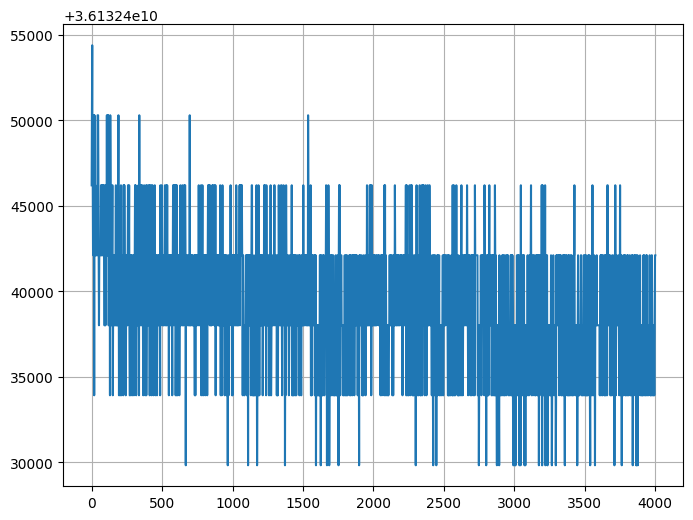

In [31]:
y, eng = np.loadtxt("data/energy.xvg",comments=["@", "#"],unpack=True)
plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(y, eng)

---

#### Рассчет профиля плотности

In [11]:
os.system(f'echo 7 | gmx density -f data/{filename} -s data/{filename} -o data/density -d Z -sl 200 -dens number -ng 1')
os.system(f'rm data/#*#')

                  :-) GROMACS - gmx density, 2023-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2023/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2023
Working dir:  /Users/alexey/Dev/MD_conf
Command line:
  gmx density -f data/cal_wd_12943_504 -s data/cal_wd_12943_504 -o data/density -d Z -sl 200 -dens number -ng 1

Reading file data/cal_wd_12943_504.tpr, VERSION 2019.2 (single precision)

Select 1 group to calculate density for:
Group     0 (         System) has 74727 elements
Group     1 (          Other) has 74727 elements
Group     2 (             Oh) has   128 elements
Group     3 (            Caa) has  6122 elements
Group     4 (           OCaa) has 18431 elements
Group     5 (           CCaa) has  6177 elements
Group     6 (          WATER) has 38829 elements
Group     7 (          DECAN) has  5040 elements
Reading frame      50 time   25.000   

Selected 7: 'DECAN'


Last frame        100 time   50.000   

Read 101 frames from trajectory. Calculating density

Back Off! I just backed up data/density.xvg to data/#density.xvg.1#

GROMACS reminds you: "Nada e organico, e tudo programado" (Pitty)



0

(3.0, 7.872180875000001)

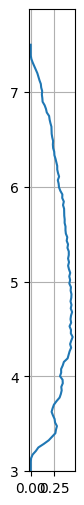

In [23]:
y, dens = np.loadtxt("data/density.xvg",comments=["@", "#"],unpack=True)
plt.figure(figsize=(8, 6))
plt.grid()
ax = plt.gca()
ax.set_aspect(1)
plt.plot(dens / 33, y)
plt.ylim(bottom=3)


---

### Рассчет профиля заряды

In [55]:
os.system(f'echo 2 3 4 5 | gmx density -f data/{filename} -s data/{filename} -o data/charge -d Z -sl 200 -dens charge -ng 4')
os.system(f'rm data/#*#')

                  :-) GROMACS - gmx density, 2023-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2023/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2023
Working dir:  /Users/alexey/Dev/MD_conf
Command line:
  gmx density -f data/cal_wd_11094_1009 -s data/cal_wd_11094_1009 -o data/charge -d Z -sl 200 -dens charge -ng 4

Reading file data/cal_wd_11094_1009.tpr, VERSION 2019.2 (single precision)

Select 4 groups to calculate density for:
Group     0 (         System) has 74230 elements
Group     1 (          Other) has 74230 elements
Group     2 (             Oh) has   128 elements
Group     3 (            Caa) has  6122 elements
Group     4 (           OCaa) has 18431 elements
Group     5 (           CCaa) has  6177 elements
Group     6 (          WATER) has 33282 elements
Group     7 (          DECAN) has 10090 elements
Reading frame      50 time   25.000    a group: Select a group: 

Selected 2: 'Oh'
Selected 3: 'Caa'
Selected 4: 'OCaa'
Selected 5: 'CCaa'


Last frame        100 time   50.000   

Read 101 frames from trajectory. Calculating density

Back Off! I just backed up data/charge.xvg to data/#charge.xvg.1#

GROMACS reminds you: "This is Tense !" (Star Wars Episode I The Phantom Menace)



0

-0.00018100000011500583


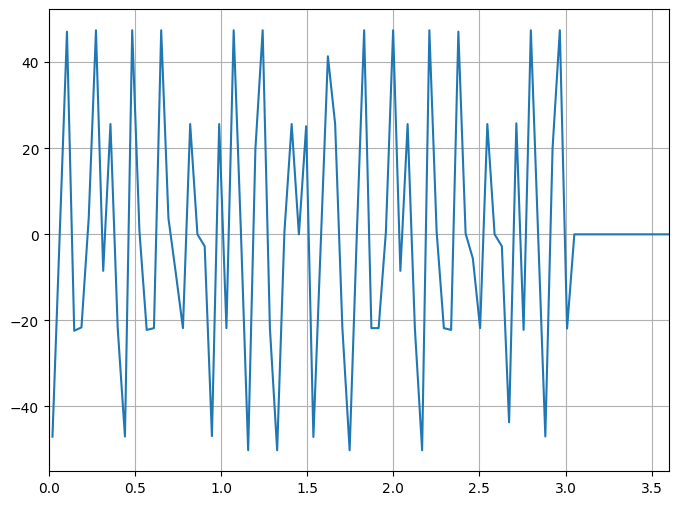

In [59]:
z, c1, c2, c3, c4 = np.loadtxt("data/charge.xvg",comments=["@", "#"],unpack=True)
plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(z, c1 + c2 + c3 + c4)
plt.xlim(0, 3.6)
print(np.sum(c1 + c2 + c3 + c4))

In [36]:
structure = read_gro(f'data/car_wd_913_520.gro')
type = 'WATER'
N = 100
grid = np.zeros(N)
dr = structure.box / N

for a in structure.atoms:
    if (a.mol_name == type):
        id = np.floor(a.xyz / dr).astype(int)
        id -= (id == N)

        grid[id[0], id[1], id[2]] += 1

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

---

In [27]:
l = WIDTH_Y / HEIGHT
l

2.0755846153846154

In [28]:
print(np.pi / 4 / l, 1 + (np.pi - 4) / 4 / l)

0.37839852809465463 0.8966065584549608


In [29]:
angle = cylinder_segment.get_volume() / box.get_volume()
angle

0.2513084596259475

In [30]:
def rho(x, l, angle):
    return (4 * angle * l + 4 * np.sqrt(1 - 4 * x * x) - np.pi) / 4 / l

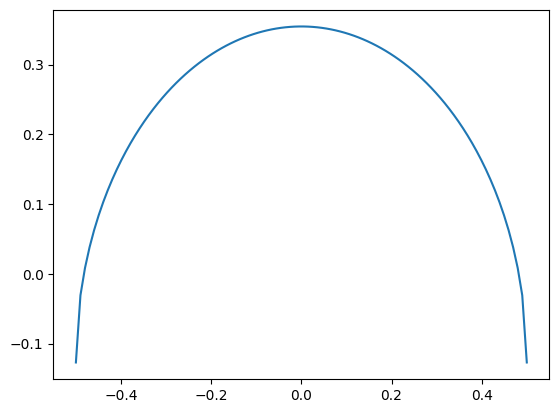

In [31]:
x = np.linspace(-0.5, 0.5, 100)
plt.plot(x, rho(x, l, angle))

7.491300000000001

In [16]:
WIDTH_X = 9.23520
WIDTH_Y = 13.49130
# HEIGHT = WIDTH_Y / 3 # 5.34
HEIGHT = 3

offset = 2
delta_h = 0.15
h = 3.02020
frac = 0.5

# Конфигурация половины
folder = f'cal_{HEIGHT:.1f}_{frac:.1f}'
dir = 'ff/gromos'

In [48]:
'''
   CH2   6  14.0270   0.0  A  7.468e-03  3.397e-05
   CH3   6  15.0350   0.0  A  9.614e-03  2.665e-05
'''

# CH2
# C6_1 = 7.468e-03
# C12_1 = 3.397e-05

# CH3
C6_1 = 9.614e-03
C12_1 = 2.665e-05

''' --------------- '''

''' 
    Ca  20  40.0780  0.0 A  1.417686e-03   2.512292e-07
   CCa   6  12.0110  0.0 A  4.586343e-03   1.425105e-05
   OCa   8  16.0000  0.0 A  2.026440e-03   1.763944e-06
   Oo   16  16.0000  0.0 A  2.026440e-03   1.763944e-06

'''

# Ca
# C6_2 = 1.417686e-03
# C12_2 = 2.512292e-07

# CCa
# C6_2 = 4.586343e-03
# C12_2 = 1.425105e-05

# OCa & Oo
C6_2 = 2.026440e-03
C12_2 = 1.763944e-06


print('C6 ', '{:e}'.format(4 * np.sqrt(C6_1 * C6_2)))
print('C12', '{:e}'.format(4 * np.sqrt(C12_1 * C12_2)))
print('{:e}'.format(4 * np.sqrt(C6_1 * C6_2)), '{:e}'.format(4 * np.sqrt(C12_1 * C12_2)))

C6  1.765546e-02
C12 2.742528e-05
1.765546e-02 2.742528e-05


In [54]:
f = 'cal_4.0_0.5'
os.system(f'scp na_diff/{f}/run_x1.sh mipt-nd:alexey/gromos_test/{f}/run_x1.sh')

0

In [59]:
# cal_dw_785_3700.gro
os.system(f'scp mipt-nd:alexey/gromos_test/cal_4.0_0.3/cal_dw_1047_4934.gro data/cal_dw_1047_4934.gro')

0

---

In [2]:
from src.utils_py.geom.Roll import Roll
from src.utils_py.geom.AntiRoll import AntiRoll

In [3]:
WIDTH_X = 10.00235
WIDTH_Y = 9.63774 
HEIGHT = 2.13
H = 3.928

In [4]:
print('l:', (WIDTH_X + WIDTH_Y) / H / 2)

l: 2.500011456211813


In [5]:
roll = Roll(
    center=np.array([WIDTH_X/2, WIDTH_Y/2, HEIGHT + H/2]),
    phi=0.5,
    theta=0,
    borders=np.array([WIDTH_X, WIDTH_Y, H]),
)

In [7]:
roll.check_point(np.array([0, 1, 0.35]) * H)

False

In [12]:
2*np.random.randint(2)-1

1

In [11]:
folder = 'na_diff/angles'
for angle in range(15, 166, 15):
    # os.system(f'python CAL_segm.py 3.928 0.5 {angle} cal_104_double')
    # os.system(f'gmx grompp -f {folder}/nvt_cal_steep.mdp -c {folder}/cal_{angle} -p {folder}/trappe -o {folder}/cal_{angle} -maxwarn 10 ')
    os.system(f'echo 5 5 | gmx density -f {folder}/gro/cal_{angle} -s {folder}/tpr/cal_{angle} -o {folder}/density/density_{angle} -d Z -sl 100 -dens number -center -ng 1')
os.system(f'rm {folder}/density/#*#')

                  :-) GROMACS - gmx density, 2023-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2023/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2023
Working dir:  /Users/alexey/Dev/MD_conf
Command line:
  gmx density -f na_diff/angles/gro/cal_15 -s na_diff/angles/tpr/cal_15 -o na_diff/angles/density/density_15 -d Z -sl 100 -dens number -center -ng 1

Reading file na_diff/angles/tpr/cal_15.tpr, VERSION 2023-Homebrew (single precision)

Note: that the center of mass is calculated inside the box without applying
any special periodicity. If necessary, it is your responsibility to first use
trjconv to make sure atoms in this group are placed in the right periodicity.

Select the group to center density profiles around:
Group     0 (         System) has 49872 elements
Group     1 (          Other) has 49872 elements
Group     2 (           CCAA) has  3840 elements
Group     3 (           OCAA) has 11520 elements
Group     4 (            CAA) has  3840 element

Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'


                  :-) GROMACS - gmx density, 2023-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2023/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2023
Working dir:  /Users/alexey/Dev/MD_conf
Command line:
  gmx density -f na_diff/angles/gro/cal_60 -s na_diff/angles/tpr/cal_60 -o na_diff/angles/density/density_60 -d Z -sl 100 -dens number -center -ng 1

Reading file na_diff/angles/tpr/cal_60.tpr, VERSION 2023-Homebrew (single precision)

Note: that the center of mass is calculated inside the box without applying
any special periodicity. If necessary, it is your responsibility to first use
trjconv to make sure atoms in this group are placed in the right periodicity.

Select the group to center density profiles around:
Group     0 (         System) has 49872 elements
Group     1 (          Other) has 49872 elements
Group     2 (           CCAA) has  3840 elements
Group     3 (           OCAA) has 11520 elements
Group     4 (            CAA) has  3840 element

Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'


                  :-) GROMACS - gmx density, 2023-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2023/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2023
Working dir:  /Users/alexey/Dev/MD_conf
Command line:
  gmx density -f na_diff/angles/gro/cal_105 -s na_diff/angles/tpr/cal_105 -o na_diff/angles/density/density_105 -d Z -sl 100 -dens number -center -ng 1

Reading file na_diff/angles/tpr/cal_105.tpr, VERSION 2023-Homebrew (single precision)

Note: that the center of mass is calculated inside the box without applying
any special periodicity. If necessary, it is your responsibility to first use
trjconv to make sure atoms in this group are placed in the right periodicity.

Select the group to center density profiles around:
Group     0 (         System) has 49872 elements
Group     1 (          Other) has 49872 elements
Group     2 (           CCAA) has  3840 elements
Group     3 (           OCAA) has 11520 elements
Group     4 (            CAA) has  3840 ele

Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'
Selected 5: 'DECAN'


                  :-) GROMACS - gmx density, 2023-Homebrew (-:

Executable:   /opt/homebrew/bin/../Cellar/gromacs/2023/bin/gmx
Data prefix:  /opt/homebrew/bin/../Cellar/gromacs/2023
Working dir:  /Users/alexey/Dev/MD_conf
Command line:
  gmx density -f na_diff/angles/gro/cal_150 -s na_diff/angles/tpr/cal_150 -o na_diff/angles/density/density_150 -d Z -sl 100 -dens number -center -ng 1

Reading file na_diff/angles/tpr/cal_150.tpr, VERSION 2023-Homebrew (single precision)

Note: that the center of mass is calculated inside the box without applying
any special periodicity. If necessary, it is your responsibility to first use
trjconv to make sure atoms in this group are placed in the right periodicity.

Select the group to center density profiles around:
Group     0 (         System) has 49872 elements
Group     1 (          Other) has 49872 elements
Group     2 (           CCAA) has  3840 elements
Group     3 (           OCAA) has 11520 elements
Group     4 (            CAA) has  3840 ele

0